In [1]:
# ignore warnings

import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
import numpy as np
import pandas as pd

In [3]:
file_path = 'asdf_single_space_log.csv'

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f', 'None']

col_names = x_names + y_names

df = pd.read_csv(file_path, names=col_names)
df.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.751972,0.190719,-0.000040,0.665449,0.224061,-0.052495,0.620955,0.278370,-0.106833,0.596607,...,0.562276,-0.170758,0.789918,0.611925,-0.175689,0,0,0,0,NaN
1,0.751872,0.191413,-0.000044,0.665630,0.224076,-0.052848,0.621325,0.278716,-0.107101,0.597084,...,0.563556,-0.171653,0.788661,0.613057,-0.176105,0,0,0,0,NaN
2,0.751532,0.191176,-0.000035,0.664815,0.224552,-0.053619,0.620948,0.278724,-0.108520,0.597350,...,0.562891,-0.174294,0.788651,0.612437,-0.179876,0,0,0,0,NaN
3,0.750785,0.192432,-0.000032,0.664394,0.224349,-0.054367,0.620833,0.277041,-0.109724,0.597407,...,0.561866,-0.171563,0.787544,0.610522,-0.176299,0,0,0,0,NaN
4,0.751267,0.191151,-0.000027,0.664975,0.224834,-0.051207,0.621095,0.279007,-0.103967,0.598054,...,0.558485,-0.162821,0.789547,0.607738,-0.166901,0,0,0,0,NaN


In [4]:
y_names_origin = ['a', 's', 'd', 'f']

for row in range(len(df)):
    df['None'].iloc[row] = 1
    for value in df[y_names_origin].iloc[row]:
        if value == 1:
            df['None'].iloc[row] = 0
            break

In [5]:
import sys, os
sys.path.append(os.pardir)

from visualization.smoother import gamma_smoothing, average_smoothing

In [6]:
df = gamma_smoothing(df)  # takes about 1 min
# df = average_smoothing(df)
df.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.751972,0.190719,-0.000040,0.665449,0.224061,-0.052495,0.620955,0.278370,-0.106833,0.596607,...,0.562276,-0.170758,0.789918,0.611925,-0.175689,0,0,0,0,1.0
1,0.751932,0.190997,-0.000042,0.665521,0.224067,-0.052636,0.621103,0.278508,-0.106940,0.596798,...,0.562788,-0.171116,0.789415,0.612378,-0.175855,0,0,0,0,1.0
2,0.751772,0.191068,-0.000039,0.665239,0.224261,-0.053029,0.621041,0.278595,-0.107572,0.597019,...,0.562829,-0.172387,0.789110,0.612401,-0.177464,0,0,0,0,1.0
3,0.751377,0.191614,-0.000036,0.664901,0.224296,-0.053564,0.620958,0.277973,-0.108433,0.597174,...,0.562444,-0.172058,0.788483,0.611650,-0.176998,0,0,0,0,1.0
4,0.751333,0.191429,-0.000033,0.664931,0.224511,-0.052621,0.621013,0.278387,-0.106647,0.597526,...,0.560860,-0.168363,0.788909,0.610085,-0.172959,0,0,0,0,1.0


In [7]:
# normalization, about 1 min

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in x_names:
	df_column = df[column]
	df_column = df_column.values.reshape(-1, 1)
	df_column = scaler.fit_transform(df_column)

	for row in range(len(df)):
		df[column].iloc[row] = df_column[row]


In [8]:
# x, y split
x, y = df[x_names], df[y_names]

In [9]:
# train, test split
train_test_ratio = 0.95

train_num = int(len(df) * 0.95)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

# train_test_ratio = 0.2

# train_num = int(len(df) * 0.2)

# x_train, x_test = x[train_num:], x[:train_num]
# y_train, y_test = y[train_num:], y[:train_num]

In [10]:
# apply mlp

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(63,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),   
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [11]:
model.fit(x_train, y_train, epochs=100)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/100
535/535 [==============================] - 1s 770us/step - loss: 1.1010 - accuracy: 0.6054
Epoch 2/100
535/535 [==============================] - 0s 730us/step - loss: 0.7119 - accuracy: 0.7267
Epoch 3/100
535/535 [==============================] - 0s 704us/step - loss: 0.5758 - accuracy: 0.7694
Epoch 4/100
535/535 [==============================] - 0s 772us/step - loss: 0.5303 - accuracy: 0.7865
Epoch 5/100
535/535 [==============================] - 0s 740us/step - loss: 0.5078 - accuracy: 0.7958
Epoch 6/100
535/535 [==============================] - 0s 702us/step - loss: 0.4910 - accuracy: 0.8082
Epoch 7/100
535/535 [==============================] - 0s 713us/step - loss: 0.4806 - accuracy: 0.8108
Epoch 8/100
535/535 [==============================] - 0s 764us/step - loss: 0.4707 - accuracy: 0.8156
Epoch 9/100
535/535 [==============================] - 0s 888us/step - loss: 0.4620 - accuracy: 0.8203
Epoch 10/100
535/535 [==============================] - 0s 723us/step - l

[0.5200580358505249, 0.7924528121948242]

In [30]:
predict = model.predict(x_test)

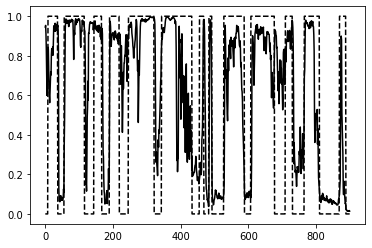

In [31]:
import matplotlib.pyplot as plt

size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

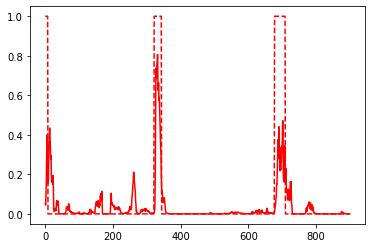

In [32]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')


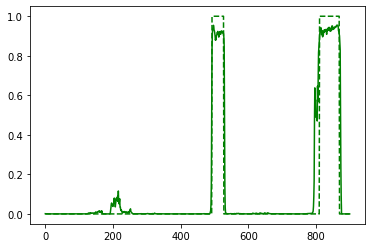

In [33]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

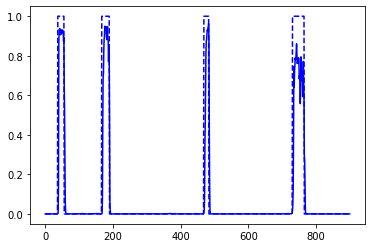

In [34]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

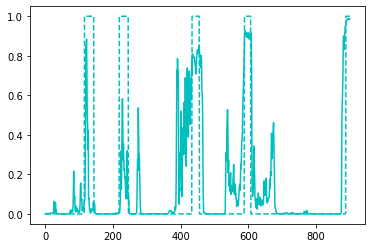

In [35]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')

In [36]:
def up_sensivity(data, sensivity=2):

    denominator = (sensivity * sum(data) - (sensivity - 1)* data[4])
    
    data[0], data[1], data[2], data[3], data[4] = (
    sensivity * data[0] / denominator,
    sensivity * data[1] / denominator,
    sensivity * data[2] / denominator,
    sensivity * data[3] / denominator,
    data[4] / denominator
    )

    return data
    

In [37]:
for row in range(len(predict)):
    predict[row] = up_sensivity(predict[row], 3)

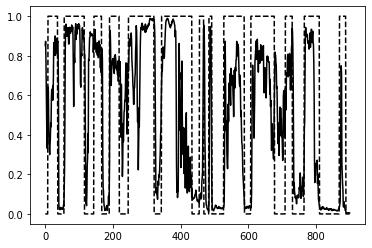

In [38]:
plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

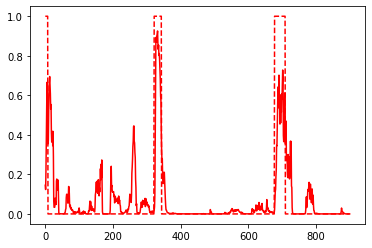

In [39]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')

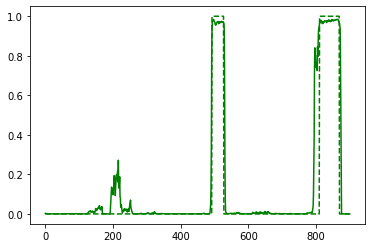

In [40]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

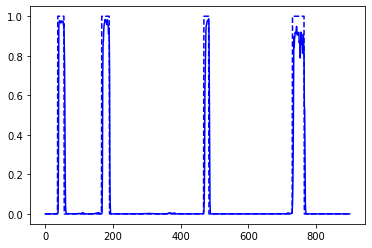

In [41]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

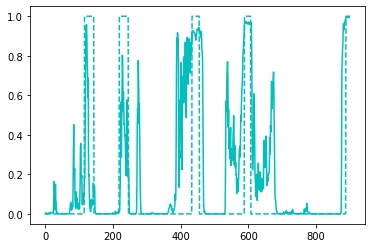

In [42]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')